# Examples of the usage

In [ ]:
# for running Ollama in Google colab
!pip install colab-xterm #https://pypi.org/project/colab-xterm/
%load_ext colabxterm

Once the xterm is open, we can proceed with the installation of Ollama by running the commented commands in the xterm:

In [ ]:
%xterm
# run cmd below in xterm
 # curl https://ollama.ai/install.sh | sh
 # ollama serve

In [ ]:
%pip install urban-worm --upgrade

Import dataset class

In [ ]:
from urbanworm import UrbanDataSet

In [6]:
bbox = (-83.235572,42.348092,-83.235154,42.348806)
data = UrbanDataSet()
data.bbox2Buildings(bbox)

'5 buildings found in the bounding box.'

In [5]:
data.units

,geometry
0,"POLYGON ((-83.23534 42.3488, -83.23523 42.3488..."
1,"POLYGON ((-83.23533 42.34865, -83.23522 42.348..."
2,"POLYGON ((-83.23533 42.3485, -83.23522 42.3485..."
3,"POLYGON ((-83.23533 42.34835, -83.23521 42.348..."
4,"POLYGON ((-83.23532 42.34821, -83.23521 42.348..."


<Axes: >

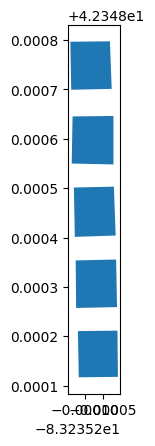

In [7]:
data.units.plot()

In [8]:
system = '''
    Given a top view image, you are going to roughly estimate house conditions. Your answer should be based only on your observation. 
    The format of your response must include question, answer (yes or no), explaination (within 50 words)
'''
prompt = {
    'top':'''
        Is there any damage on the roof?
    '''
}

# inspect the aerial images only (with type='top')
res = data.loopUnitChat(system=system, prompt=prompt, type='top', epsg=2253)

The output can be assigned to a new variable. It is also automatically stored in the data structure and can be called.

In [10]:
data.to_gdf()

,geometry,top_view_question1,top_view_answer1,top_view_explanation1,top_view_base64
0,POINT (-83.23528 42.34875),Is there any damage on the roof?,no,The image does not show any visible signs of d...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
1,POINT (-83.23528 42.3486),Is there any damage on the roof?,no,The image does not show any visible signs of d...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
2,POINT (-83.23527 42.34845),Is there any damage on the roof?,no,The image does not show any visible signs of d...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
3,POINT (-83.23527 42.34831),Is there any damage on the roof?,no,The image does not show any visible signs of d...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
4,POINT (-83.23526 42.34816),Is there any damage on the roof?,no,The image is too blurry to determine if there ...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...


With `type = 'both'` (The default is `top`.), the method `loopUnitChat` can inspect both aerial and street view images. 
With `multi = True` (The default is `False`), for each unit, three closest street views will be collected for inference. This will take longer time to process the data.

In this case, the instruction and prompt will be little bit different and more detailed for specifying questions for each type of image.

In [ ]:
system = '''
    Given a top view image or street view images, you are going to roughly estimate house conditions. 
    Your answer should be based only on your observation. 
    The format of your response must include question, answer (yes or no), explaination (within 50 words) for each question.
'''

prompt = {
    'top': '''
        Is there any damage on the roof?
    ''',
    'street': '''
        Is the house occupied?
        Is any window broken or boarded?
        Is the door missing or boarded?
        Is the wall missing or damaged?
        Is the yard maintained well?
    '''
}

# add the Mapillary key
data.mapillary_key = 'MLY|...'
# inspect both the aerial and street view images (with type='both')
res = data.loopUnitChat(system=system, prompt=prompt, type='both', epsg=2253, multi=True)

In [12]:
data.to_gdf()

,geometry,top_view_question1,top_view_answer1,top_view_explanation1,street_view_question1,street_view_answer1,street_view_explanation1,street_view_question2,street_view_answer2,street_view_explanation2,...,street_view_answer3,street_view_explanation3,street_view_question4,street_view_answer4,street_view_explanation4,street_view_question5,street_view_answer5,street_view_explanation5,top_view_base64,street_view_base64
0,POINT (-83.23528 42.34875),Is there any damage on the roof?,no,"The roof appears to be intact and undamaged, w...","[Is the house occupied?, Is the house occupied...","[yes, No, yes]","[There are lights on in some of the windows., ...","[Is any window broken or boarded?, Is any wind...","[no, Yes, no]","[All the windows appear to be intact, One of t...",...,"[no, No, no]",[The front door is visible and appears to be i...,"[Is the wall missing or damaged?, Is the wall ...","[no, Yes, no]","[All walls appear to be intact and undamaged, ...","[Is the yard maintained well?, Is the yard mai...","[yes, No, yes]",[The grass is green and there are no visible s...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,[iVBORw0KGgoAAAANSUhEUgAAAZAAAAEsCAIAAABi1XKVA...
1,POINT (-83.23528 42.3486),Is there any damage on the roof?,no,"The roof appears to be intact, with no visible...","[Is the house occupied?, Is the house occupied...","[yes, No, Yes]","[There are objects in front of the house, sugg...","[Is any window broken or boarded?, Is any wind...","[no, Yes, No]",[All windows appear to be intact and unobstruc...,...,"[no, No, No]",[The front door is visible and appears to be i...,"[Is the wall missing or damaged?, Is the wall ...","[no, Yes, No]","[All walls appear to be intact and undamaged.,...","[Is the yard maintained well?, Is the yard mai...","[yes, No, Yes]","[The lawn is green and well-manicured, suggest...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,[iVBORw0KGgoAAAANSUhEUgAAAZAAAAEsCAIAAABi1XKVA...
2,POINT (-83.23527 42.34845),Is there any damage on the roof?,no,"The roof appears to be intact, with no visible...","[Is the house occupied?, Is the house occupied...","[No, No, No]",[There are no cars parked in front of the hous...,"[Is any window broken or boarded?, Is any wind...","[Yes, Yes, Yes]",[One of the windows on the second floor appear...,...,"[No, No, No]",[The front door is visible and does not appear...,"[Is the wall missing or damaged?, Is the wall ...","[Yes, Yes, Yes]",[There appears to be some damage or disrepair ...,"[Is the yard maintained well?, Is the yard mai...","[No, No, No]","[The yard is overgrown with weeds and debris, ...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,[iVBORw0KGgoAAAANSUhEUgAAAZAAAAEsCAIAAABi1XKVA...
3,POINT (-83.23527 42.34831),Is there any damage on the roof?,no,"The roof appears to be intact, with no visible...","[Is the house occupied?, Is the house occupied...","[No, No, No]","[There is no car parked in front of the house,...","[Is any window broken or boarded?, Is any wind...","[Yes, Yes, Yes]",[One of the windows on the second floor appear...,...,"[No, No, No]",[The front door is visible and does not appear...,"[Is the wall missing or damaged?, Is the wall ...","[Yes, Yes, Yes]",[There appears to be some damage or disrepair ...,"[Is the yard maintained well?, Is the yard mai...","[No, No, No]","[The yard seems overgrown and unkempt, suggest...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,[iVBORw0KGgoAAAANSUhEUgAAAZAAAAEsCAIAAABi1XKVA...
4,POINT (-83.23526 42.34816),Is there any damage on the roof?,no,"The roof appears to be intact, with no visible...","[Is the house occupied?, Is the house occupied...","[No, yes, No]",[There are no cars parked in front of the hous...,"[Is any window broken or boarded?, Is any wind...","[Yes, no, Yes]",[One of the windows on the second floor appear...,...,"[No, no, No]",[The front door is visible and does not appear...,"[Is the wall missing or damaged?, Is the wall ...","[Yes, no, Yes]",[There appears to be some damag